# **Here we will show training through Visualisation**

# *Importing trained_model and required dataset*

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WNU93LLN8FUCGoH7qUcd")
project = rf.workspace("varun-qlsfy").project("table-detection-gomjy")
version = project.version(10)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Table-Detection-10 in yolov8:: 100%|██████████| 3434/3434 [00:00<00:00, 5260.78it/s]


In [1]:
from google.colab import files
uploaded = files.upload()

Saving trained_model.pt to trained_model.pt


# *Running Validation and showing predictions*

In [13]:
metrics = model.val(save=True)  # Run validation

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/Table-Detection-10/valid/labels.cache... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]


                   all        173        999      0.915      0.958      0.974       0.91
              occupied        163        705      0.944          1      0.995      0.949
      unoccupied-clean        139        282      0.887      0.989      0.991       0.93
      unoccupied-dirty         11         12      0.914      0.885      0.935       0.85
Speed: 4.1ms preprocess, 20.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val2


In [ ]:
!pip install ultralytics


image 1/173 /content/Table-Detection-10/valid/images/cam1_1hour_frame_0019_jpg.rf.66d8c43c1e20a14ae1e58a4dd99d34bb.jpg: 640x640 2 occupieds, 37.0ms
image 2/173 /content/Table-Detection-10/valid/images/cam1_1hour_frame_0035_jpg.rf.58d5092441a456b84b8d9c422285c416.jpg: 640x640 1 occupied, 1 unoccupied-clean, 37.1ms
image 3/173 /content/Table-Detection-10/valid/images/cam1_1hour_frame_0045_jpg.rf.d49ab195418677444fdc89eb1a813fbc.jpg: 640x640 2 occupieds, 36.9ms
image 4/173 /content/Table-Detection-10/valid/images/cam1_1hour_frame_0056_jpg.rf.d926cbcf59f25f2e4d60df272b171156.jpg: 640x640 2 occupieds, 37.0ms
image 5/173 /content/Table-Detection-10/valid/images/cam1_1hour_frame_0058_jpg.rf.19d964707829d2d13450ef49719e0c1c.jpg: 640x640 2 occupieds, 1 unoccupied-clean, 37.1ms
image 6/173 /content/Table-Detection-10/valid/images/cam1_1hour_frame_0059_jpg.rf.1e8b432d11a77f85991eaa596378a025.jpg: 640x640 1 occupied, 1 unoccupied-clean, 37.0ms
image 7/173 /content/Table-Detection-10/valid/images/

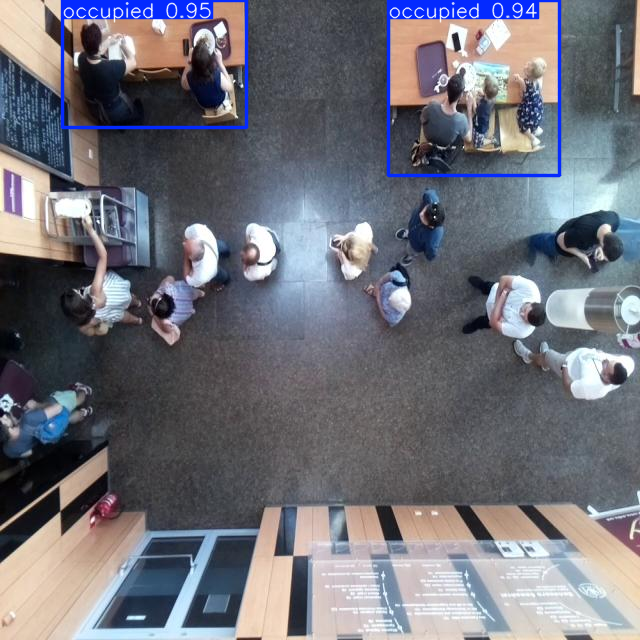

In [9]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load model
model = YOLO("trained_model.pt")

# Run predictions on validation set
results = model.predict(source="/content/Table-Detection-10/valid/images", save=True, conf=0.25)

res = results[0]
res.show()

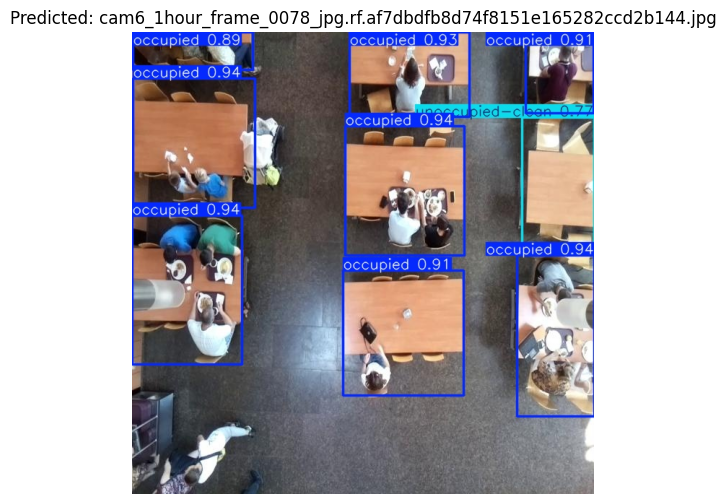

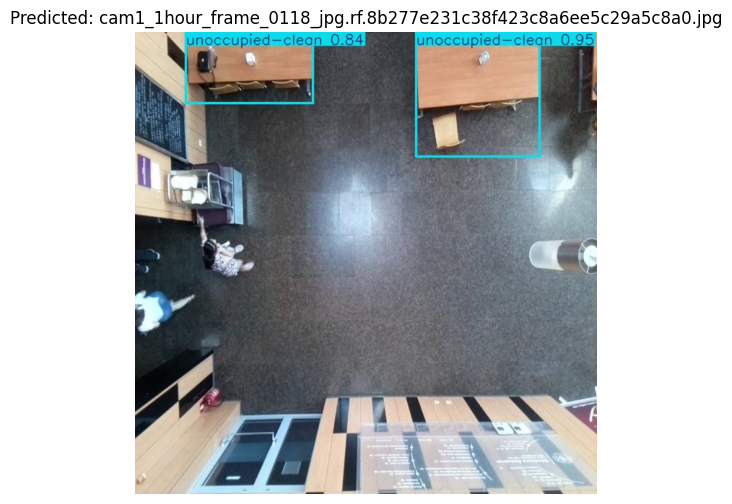

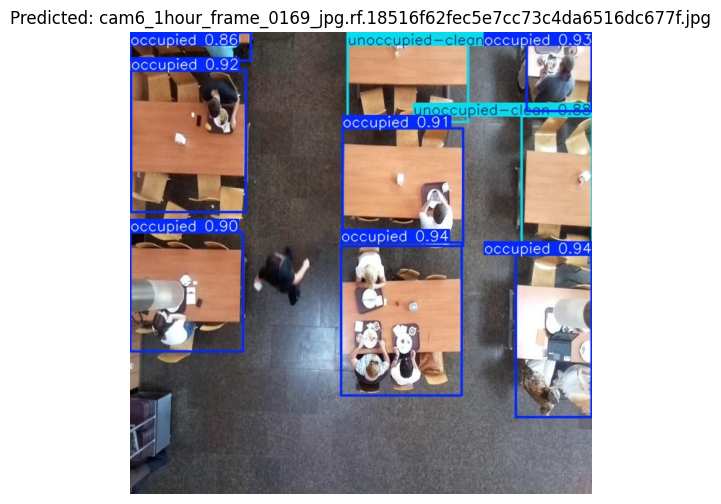

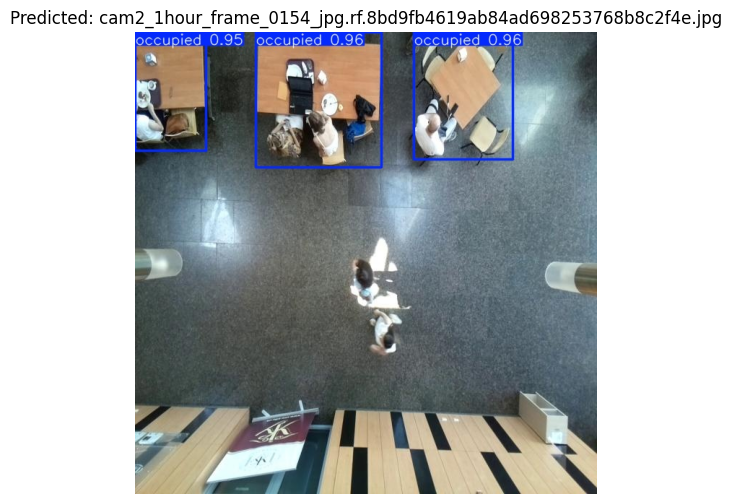

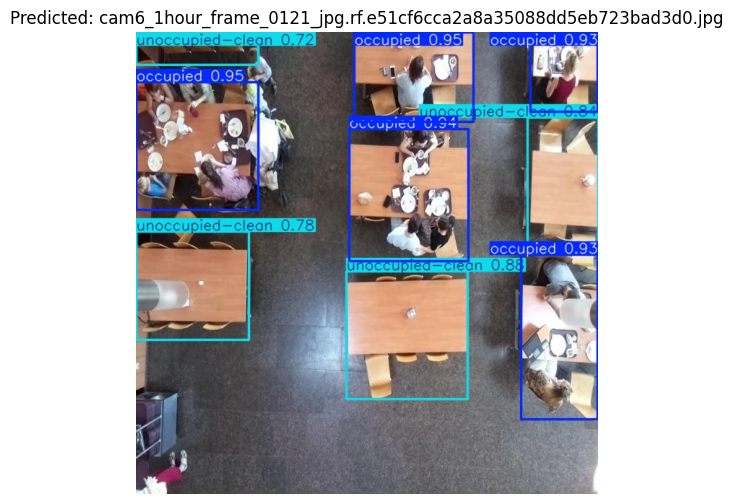

In [12]:
import os
from PIL import Image

image_folder = "/content/runs/detect/predict"  # path to saved predictions
images = os.listdir(image_folder)

# Show first 5 predicted images
for i in range(min(5, len(images))):
    img = Image.open(os.path.join(image_folder, images[i]))
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(f"Predicted: {images[i]}")
    plt.axis('off')
    plt.show()


# *Confusion Matrix and Precision-Recall*

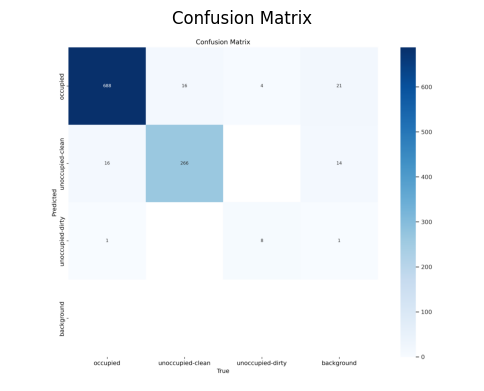

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

# Load and show Confusion Matrix
conf_matrix_path = "/content/runs/detect/val/confusion_matrix.png"
conf_img = Image.open(conf_matrix_path)

plt.figure(figsize=(6, 6))
plt.imshow(conf_img)
plt.axis('off')
plt.title("Confusion Matrix")
plt.show()

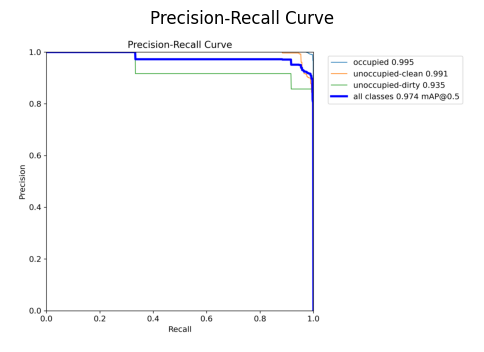

In [15]:
# Load and show Precision-Recall Curve
pr_curve_path = "/content/runs/detect/val/PR_curve.png"
pr_img = Image.open(pr_curve_path)

plt.figure(figsize=(6, 6))
plt.imshow(pr_img)
plt.axis('off')
plt.title("Precision-Recall Curve")
plt.show()